# KNN: Predicting Customer Class

### Importing Libraries

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing, model_selection, metrics
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

### Reading CSV File

In [101]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Reading Columns

In [102]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

### Defining Attributes and Label

In [103]:
predict = "custcat"

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  
y = df[predict].values

### Prepping Dataset For Train/Test-Split

In [104]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

### Calculating Max Possible K-Value

In [105]:
import math

neigh = math.floor(math.sqrt(len(y_train)))
if neigh % 2 == 0:
    neigh = neigh - 1

### Visualing Classification

This will help us decided what type of average we want to use for our F1 score.

In [106]:
df[predict].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

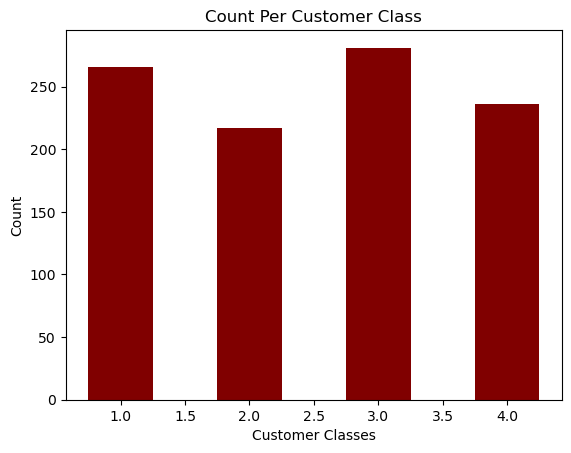

In [132]:
plt.bar(df[predict].value_counts().index, df[predict].value_counts().values, color ='maroon', width = 0.5)
plt.xlabel('Customer Classes')
plt.ylabel('Count')
plt.title('Count Per Customer Class')
plt.show()

### Training Model Over Different K-Values

In [107]:
all_scores = np.zeros(neigh)

for n in range(1, neigh + 1):    
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train)

    y_hat = model.predict(X_test)

    # acc = model.score(X_test, y_test)
    # acc = metrics.accuracy_score(y_test, y_hat)
    f1 = metrics.f1_score(y_test, y_hat, average = 'micro')

    all_scores[n - 1] = f1

### Plotting Over All K-Values

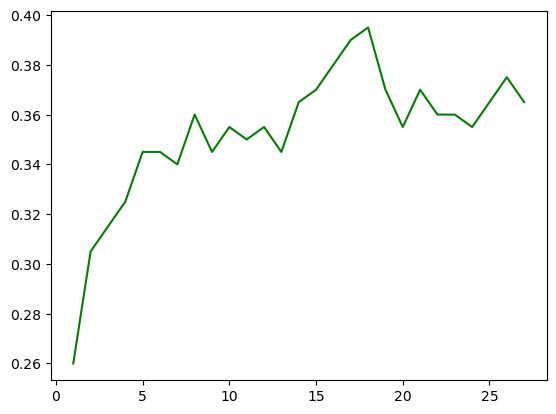

In [108]:
plt.plot(range(1, neigh + 1), all_scores, 'g')
plt.show()

### Deciding Best K-Value

In [133]:
best_k = all_scores.argmax()+1

print("The best accuracy was with", all_scores.max(), "with k =", best_k) 

The best accuracy was with 0.395 with k = 18


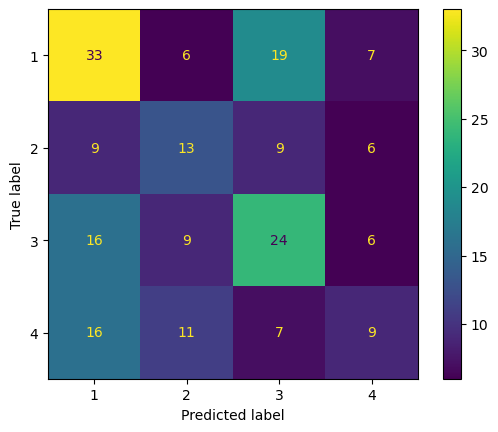

In [145]:
model = KNeighborsClassifier(n_neighbors = best_k)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_hat)
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['1', '2', '3', '4'])
cm_disp.plot()
plt.show()